# ORIE 3120 Final Project 

## **US Traffic Accidents (2016-2023)**

### **Authors**: *Melissa Eckert, Avery Hastings, Judith Jatto, & Nithya Mani*

### Data Introduction & Description

Link to data on Kaggle: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

Link to data description: https://smoosavi.org/datasets/us_accidents

### Project Goals & Questions

### Exploratory Data Analysis

Load Packages & Dataset

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Data/US_Accidents_March23.csv")

In [11]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [13]:
#Look at null values 

df.isnull().sum()

#a lot of values missing for 'end_lat' and 'end_lng', but could still make a map based on start coordinates

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

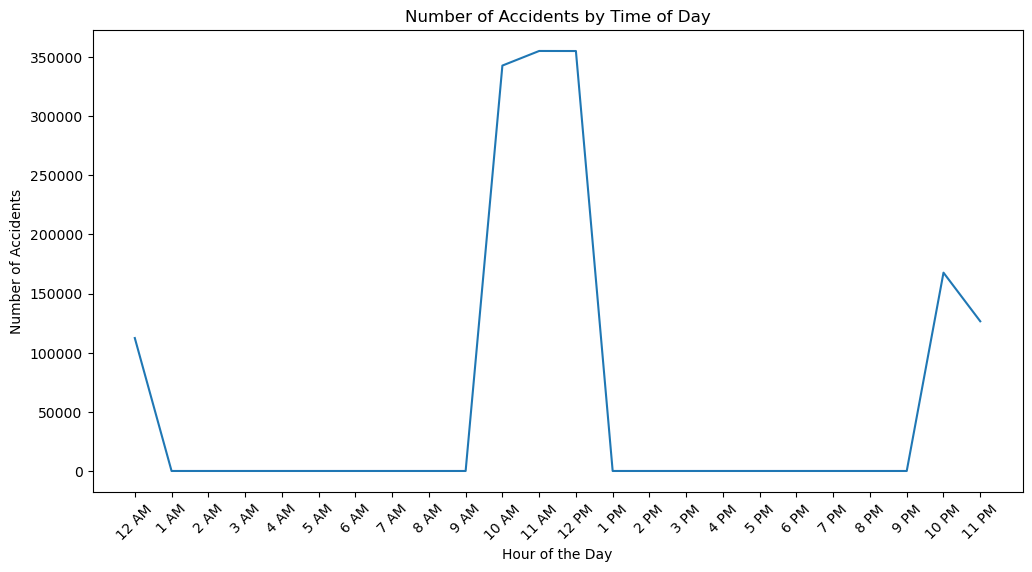

In [36]:
time_df = df
time_df['Start_Time'] = pd.to_datetime(df['Start_Time'], format = 'mixed')
time_df['End_Time'] = pd.to_datetime(df['End_Time'], format = 'mixed')
time_df['duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds()

hour_order = [f"{h%12 or 12} {'AM' if h<12 else 'PM'}" for h in range(24)]
time_df['Hour'] = df['Start_Time'].dt.hour
time_df['Hour'] = pd.to_datetime(df['Hour'], format='%H').dt.strftime('%I %p')
time_df['Hour'] = pd.Categorical(time_df['Hour'], categories=hour_order, ordered=True)

accidents_per_hour = time_df['Hour'].value_counts().sort_index()

plt.figure(figsize = (12,6))
plt.plot(accidents_per_hour.index, accidents_per_hour.values)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Time of Day")
plt.xticks(rotation = 45)
plt.show()